# Druglikeness



In [2]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem.Draw import IPythonConsole
import csv

with open('data/CHEMBL27-chembl_27_activity-Or8O5vK6yNZ1L5id7ev7PGK1lWhfDfRKRJbbuXPM9Os=.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    cnr1_ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [16:11:47] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:11:47] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [16:11:47] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [16:11:47] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [16:11:47] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:11:48] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:11:48] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [16:11:48] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:11:48] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [16:11:48] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [16:11:48] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [16:11:48] Can't kek

RDKit ERROR: [16:11:48] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [16:11:48] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [16:11:48] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [16:11:48] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [16:11:48] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [16:11:48] ERROR: Could not sanitize molecule ending on line 469201
RDKit ERROR: [16:11:48] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [16:11:48] Explicit valence for atom # 53 N, 4, is greater than permitted
RDKit ERROR: [16:11:48] ERROR: Could not sanitize molecule ending on line 472285
RDKit ERROR: [16:11:48] ERROR: Explicit valence for atom # 53 N, 4, is greater than permitted
RDKit ERROR: [16:11:48] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 12
RDKit ERROR

RDKit ERROR: [16:11:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:11:51] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [16:11:51] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [16:11:51] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [16:11:51] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [16:11:51] ERROR: Could not sanitize molecule ending on line 1151592


In [3]:
def too_many_hbd(mol):
    return rdescriptors.CalcNumLipinskiHBD(mol) > 5

def too_many_hba(mol):
    return rdescriptors.CalcNumLipinskiHBA(mol) > 10

def too_heavy(mol):
    return rdescriptors.CalcExactMolWt(mol) > 500

def too_greasy(mol):
    return Descriptors.MolLogP(mol) > 5

In [4]:
too_many_hbd(cnr1_ligands[300]), too_many_hba(cnr1_ligands[300]), \
too_heavy(cnr1_ligands[300]), too_greasy(cnr1_ligands[300])

(False, False, False, False)

In [5]:
cnr1_ligands_too_many_hbd = [too_many_hbd(l) for l in cnr1_ligands]
cnr1_ligands_too_many_hba = [too_many_hba(l) for l in cnr1_ligands]
cnr1_ligands_too_heavy = [too_heavy(l) for l in cnr1_ligands]
cnr1_ligands_too_greasy = [too_greasy(l) for l in cnr1_ligands]
sum(cnr1_ligands_too_many_hbd), sum(cnr1_ligands_too_many_hba), \
sum(cnr1_ligands_too_heavy), sum(cnr1_ligands_too_greasy), len(cnr1_ligands)

(64, 94, 554, 1082, 2698)

In [6]:
import pandas as pd
df = pd.DataFrame(data={'set':'cnr1',
                        'too_many_hbd': cnr1_ligands_too_many_hbd,
                        'too_many_hba': cnr1_ligands_too_many_hba,
                        'too_greasy': cnr1_ligands_too_greasy,
                        'too_heavy': cnr1_ligands_too_heavy})
df

,set,too_many_hbd,too_many_hba,too_greasy,too_heavy
0,cnr1,False,False,False,False
1,cnr1,False,False,False,False
2,cnr1,False,False,False,False
3,cnr1,False,False,False,False
4,cnr1,False,False,False,False
...,...,...,...,...,...
2693,cnr1,False,False,True,False
2694,cnr1,False,False,False,False
2695,cnr1,False,False,True,False
2696,cnr1,False,False,True,False


In [7]:
def ro5_violations(mol):
    return sum([too_many_hbd(mol), too_many_hba(mol), too_heavy(mol), too_greasy(mol)])

def violates_lipinski(mol):
    return ro5_violations(mol) > 1

cnr1_ro5_violations = [ro5_violations(l) for l in cnr1_ligands]
cnr1_violates_lipinski = [violates_lipinski(l) for l in cnr1_ligands]
df['fails_lipinski'] = cnr1_violates_lipinski

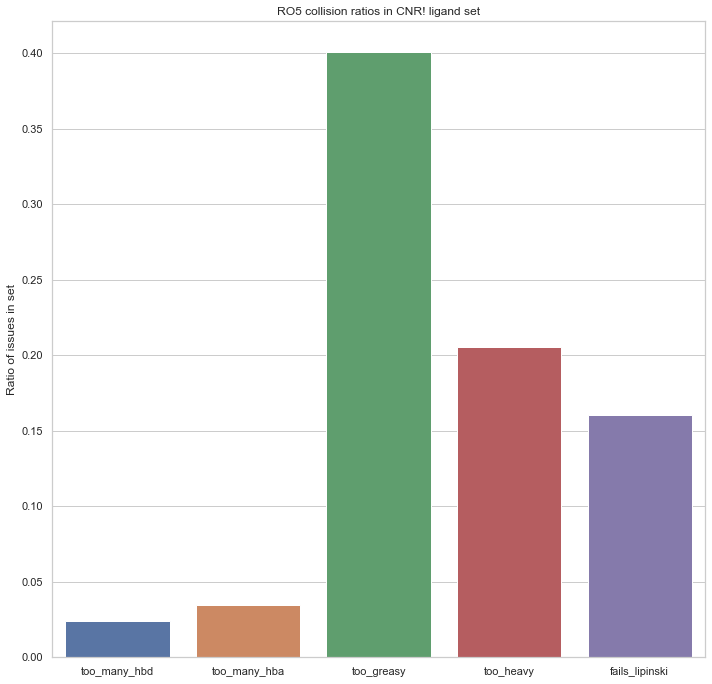

In [8]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7, 11.7)}) # for bigger graphs
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df, ci=None)
    p.set_title("RO5 collision ratios in CNR! ligand set")
    p.set_ylabel("Ratio of issues in set")

In [9]:
suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]
drug_ligands_too_many_hbd = [too_many_hbd(m) for m in drugs]
drug_ligands_too_many_hba = [too_many_hba(m) for m in drugs]
drug_ligands_too_heavy = [too_heavy(m) for m in drugs]
drug_ligands_too_greasy = [too_greasy(m) for m in drugs]
sum(drug_ligands_too_many_hbd), sum(drug_ligands_too_many_hba), \
sum(drug_ligands_too_heavy), sum(drug_ligands_too_greasy), len(drugs)

RDKit ERROR: [16:11:51] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [16:12:50] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:12:50] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [16:12:50] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [16:12:50] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [16:12:50] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [16:12:51] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:12:51] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [16:12:51] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:12:51] Explicit valence for atom # 17 O, 3, is greater than permitted
RDKit ERROR: [16:12:51] ERROR: Could not sanitize molecule ending on line 258130
RDKit ERROR: [16:12:51] ERROR: Explicit v

RDKit ERROR: [16:12:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [16:12:52] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [16:12:52] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [16:12:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [16:12:52] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [16:12:52] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [16:12:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [16:12:52] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [16:12:52] ERROR: Could not sanitize molecule ending on line 469201
RDKit ERROR: [16:12:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [16:12:52] Explicit valence for atom # 53 N, 4, is greater than pe

RDKit ERROR: [16:12:52] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [16:12:54] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [16:12:54] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [16:12:54] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [16:12:54] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [16:12:54] ERROR: Could not sanitize molecule ending on line 1151592


(929, 887, 856, 534, 7113)

In [10]:
drug_ro5_violations = [ro5_violations(m) for m in drugs]
drug_violates_lipinski = [violates_lipinski(m) for m in drugs]
df_drug = pd.DataFrame(data={'set':'drug',
                        'too_many_hbd': drug_ligands_too_many_hbd,
                        'too_many_hba': drug_ligands_too_many_hba,
                        'too_greasy': drug_ligands_too_greasy,
                        'too_heavy': drug_ligands_too_heavy,
                        'fails_lipinski': drug_violates_lipinski})
df_drug

,set,too_many_hbd,too_many_hba,too_greasy,too_heavy,fails_lipinski
0,drug,True,True,False,True,True
1,drug,True,True,False,True,True
2,drug,True,True,False,True,True
3,drug,True,True,False,True,True
4,drug,False,True,False,True,True
...,...,...,...,...,...,...
7108,drug,False,False,False,False,False
7109,drug,False,False,False,False,False
7110,drug,True,True,False,True,True
7111,drug,False,False,False,False,False


In [11]:
joint_df = pd.concat([df, df_drug], ignore_index=True)
joint_df

,set,too_many_hbd,too_many_hba,too_greasy,too_heavy,fails_lipinski
0,cnr1,False,False,False,False,False
1,cnr1,False,False,False,False,False
2,cnr1,False,False,False,False,False
3,cnr1,False,False,False,False,False
4,cnr1,False,False,False,False,False
...,...,...,...,...,...,...
9806,drug,False,False,False,False,False
9807,drug,False,False,False,False,False
9808,drug,True,True,False,True,True
9809,drug,False,False,False,False,False


In [12]:
melted_df = pd.melt(joint_df, id_vars=['set'], value_vars=['fails_lipinski'])
melted_df

,set,variable,value
0,cnr1,fails_lipinski,False
1,cnr1,fails_lipinski,False
2,cnr1,fails_lipinski,False
3,cnr1,fails_lipinski,False
4,cnr1,fails_lipinski,False
...,...,...,...
9806,drug,fails_lipinski,False
9807,drug,fails_lipinski,False
9808,drug,fails_lipinski,True
9809,drug,fails_lipinski,False


Text(0, 0.5, 'Ratio of issues in set')

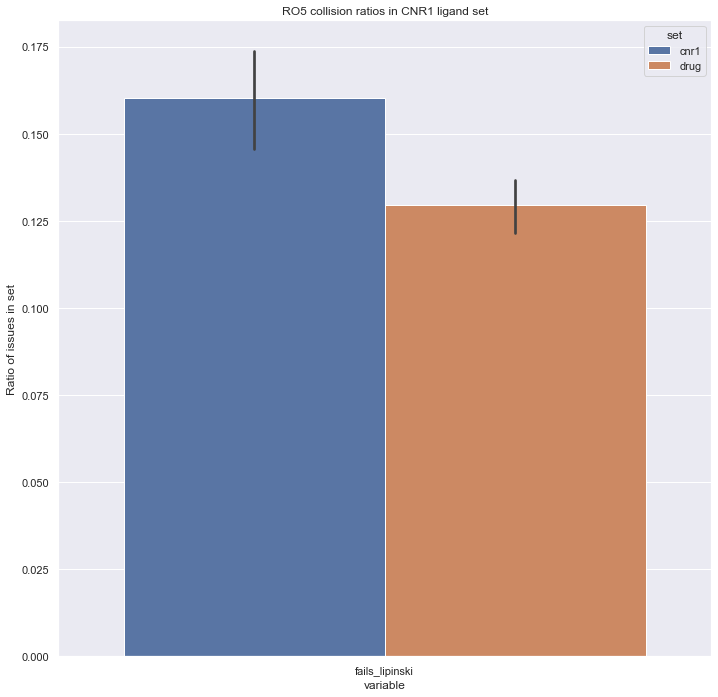

In [13]:
b = sns.barplot(y='value', x='variable', hue='set', data=melted_df)
b.set_title("RO5 collision ratios in CNR1 ligand set")
b.set_ylabel("Ratio of issues in set")

In [14]:
def even_less_hbd(mol):
    return rdescriptors.CalcNumLipinskiHBD(mol) > 3

def even_less_hba(mol):
    return rdescriptors.CalcNumLipinskiHBA(mol) > 3

def even_more_heavy(mol):
    return rdescriptors.CalcExactMolWt(mol) > 300

def even_more_greasy(mol):
    return Descriptors.MolLogP(mol) > 3

In [15]:
cnr1_ligands_even_less_hbd = [even_less_hbd(l) for l in cnr1_ligands]
cnr1_ligands_even_less_hba = [even_less_hba(l) for l in cnr1_ligands]
cnr1_ligands_even_more_heavy = [even_more_heavy(l) for l in cnr1_ligands]
cnr1_ligands_even_more_greasy = [even_more_greasy(l) for l in cnr1_ligands]
sum(cnr1_ligands_even_less_hbd), sum(cnr1_ligands_even_less_hba), \
sum(cnr1_ligands_even_more_heavy), sum(cnr1_ligands_even_more_greasy), len(cnr1_ligands)

(197, 2152, 2231, 1989, 2698)

In [16]:
def ro5_violations_2(mol):
    return sum([even_less_hbd(mol), even_less_hba(mol), even_more_heavy(mol), even_more_greasy(mol)])

def violates_lipinski_2(mol):
    return ro5_violations_2(mol) > 1
cnr1_2_violates_lipinski = [violates_lipinski_2(m) for m in cnr1_ligands]
df_1 = pd.DataFrame(data={'set':'cnr1_2',
                        'too_many_hbd': cnr1_ligands_even_less_hbd,
                        'too_many_hba': cnr1_ligands_even_less_hba,
                        'too_greasy': cnr1_ligands_even_more_greasy,
                        'too_heavy': cnr1_ligands_even_more_heavy,
                        'fails_lipinski': cnr1_2_violates_lipinski})
joint_df1 = pd.concat([df, df_1], ignore_index=True)
joint_df1

melted_df1 = pd.melt(joint_df1, id_vars=['set'], value_vars=['fails_lipinski'])
melted_df1


,set,variable,value
0,cnr1,fails_lipinski,False
1,cnr1,fails_lipinski,False
2,cnr1,fails_lipinski,False
3,cnr1,fails_lipinski,False
4,cnr1,fails_lipinski,False
...,...,...,...
5391,cnr1_2,fails_lipinski,True
5392,cnr1_2,fails_lipinski,True
5393,cnr1_2,fails_lipinski,True
5394,cnr1_2,fails_lipinski,True


Text(0, 0.5, 'Ratio of issues in set')

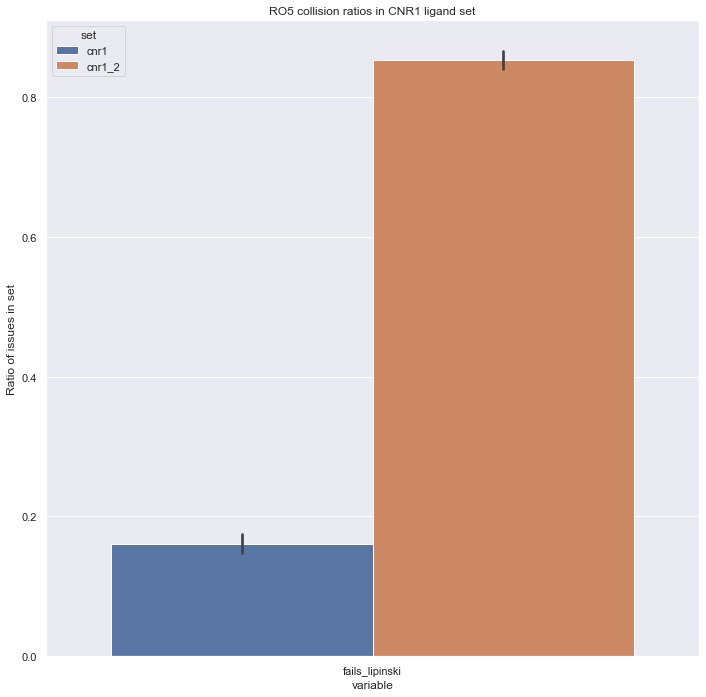

In [17]:
t = sns.barplot(y='value', x='variable', hue='set', data=melted_df1)
t.set_title("RO5 collision ratios in CNR1 ligand set")
t.set_ylabel("Ratio of issues in set")

In [18]:
from rdkit.Chem import Crippen

def bad_greasyness_ghose(mol):
    logp = Descriptors.MolLogP(mol)
    return logp > 5.6 or logp < -0.4

df['odd_greasyness'] = [bad_greasyness_ghose(l) for l in cnr1_ligands]

def bad_refractivity_ghose(mol):
    ref = Crippen.MolMR(mol)
    return ref > 130 or ref < 40
df['odd_refractivity'] = [bad_refractivity_ghose(l) for l in cnr1_ligands]

def bad_mw_ghose(mol):
    mw = rdescriptors.CalcExactMolWt(mol)
    return mw > 480 or mw < 180
df['odd_mass'] = [bad_mw_ghose(l) for l in cnr1_ligands]

def bad_atomcount_ghose(mol):
    ac = mol.GetNumHeavyAtoms()
    return ac > 70 or ac < 20
df['odd_atomcount'] = [bad_atomcount_ghose(l) for l in cnr1_ligands]

def violates_ghose(mol):
    return bad_greasyness_ghose(mol) or bad_refractivity_ghose(mol) or bad_mw_ghose(mol) or bad_atomcount_ghose(mol)
df['fails_ghose'] = [violates_ghose(l) for l in cnr1_ligands]

def too_rotatable_veber(mol):
    return Chem.CalcNumRotatableBonds(mol) > 10
df['too_rotatable'] = [too_rotatable_veber(l) for l in cnr1_ligands]

def too_large_psa_veber(mol):
    return rdescriptors.CalcTPSA(mol) > 140
df['excessive_psa'] = [too_large_psa_veber(l) for l in cnr1_ligands]

def violates_veber(mol):
    return too_rotatable_veber(mol) or too_large_psa_veber(mol)
df['fails_veber'] = [violates_veber(l) for l in cnr1_ligands]

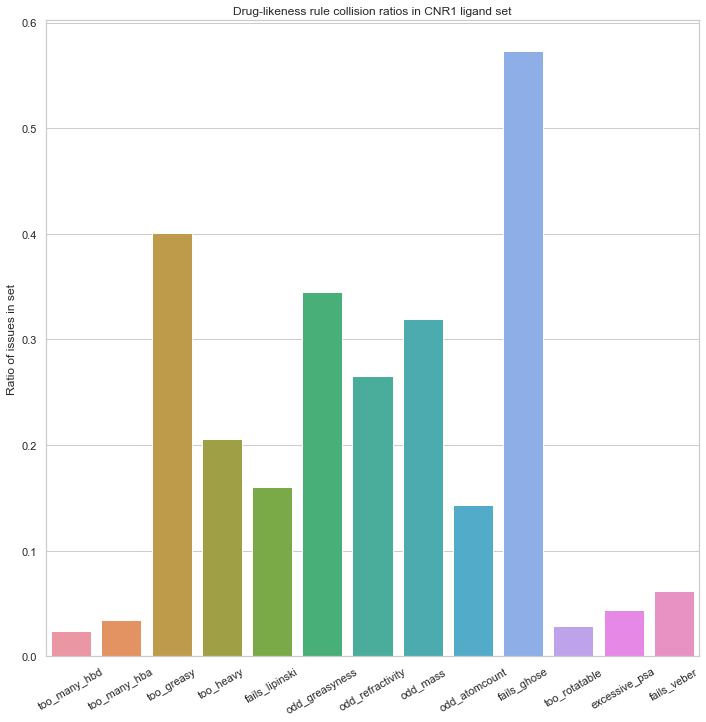

In [19]:
with sns.axes_style("whitegrid"):
    p = sns.barplot(data=df, ci=None)
    p.set_title("Drug-likeness rule collision ratios in CNR1 ligand set")
    p.set_ylabel("Ratio of issues in set")
    p.set_xticklabels(p.get_xticklabels(), rotation=30)

In [20]:
df_1.loc[df_1['fails_lipinski'] == False]

,set,too_many_hbd,too_many_hba,too_greasy,too_heavy,fails_lipinski
1,cnr1_2,False,False,False,False,False
4,cnr1_2,False,True,False,False,False
15,cnr1_2,False,False,False,False,False
17,cnr1_2,False,True,False,False,False
29,cnr1_2,False,False,True,False,False
...,...,...,...,...,...,...
2556,cnr1_2,False,True,False,False,False
2571,cnr1_2,False,False,True,False,False
2574,cnr1_2,False,False,True,False,False
2621,cnr1_2,False,False,True,False,False


In [21]:
df.loc[df['fails_lipinski'] == False]

,set,too_many_hbd,too_many_hba,too_greasy,too_heavy,fails_lipinski,odd_greasyness,odd_refractivity,odd_mass,odd_atomcount,fails_ghose,too_rotatable,excessive_psa,fails_veber
0,cnr1,False,False,False,False,False,False,False,False,False,False,False,False,False
1,cnr1,False,False,False,False,False,False,True,True,True,True,False,False,False
2,cnr1,False,False,False,False,False,False,False,False,False,False,False,False,False
3,cnr1,False,False,False,False,False,False,False,False,False,False,False,False,False
4,cnr1,False,False,False,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,cnr1,False,False,True,False,False,False,False,False,False,False,False,False,False
2694,cnr1,False,False,False,False,False,False,False,False,False,False,False,False,False
2695,cnr1,False,False,True,False,False,False,False,False,False,False,False,False,False
2696,cnr1,False,False,True,False,False,True,False,False,False,True,True,False,True


So, more strict conditions left for us only 17,6% molecules from original Lipinsky

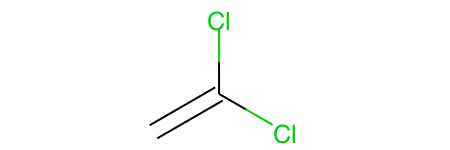

In [22]:
cnr1_ligands[1]


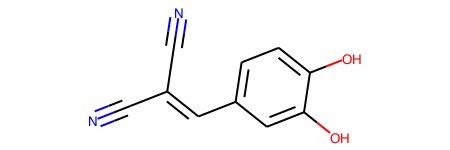

In [23]:
cnr1_ligands[4]

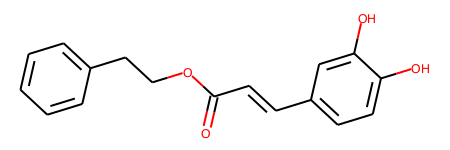

In [24]:
cnr1_ligands[17]

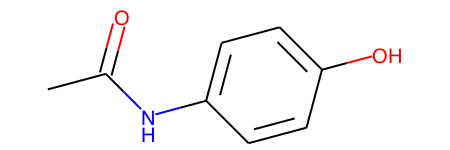

In [25]:
cnr1_ligands[15]

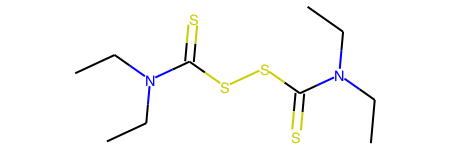

In [26]:
cnr1_ligands[29]

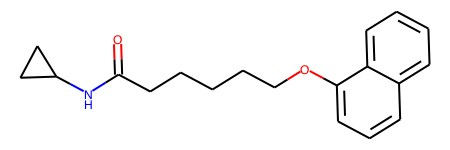

In [60]:
cnr1_ligands[2571]